In [21]:
from __future__ import division

from faculty_hiring.misc.util import *
from faculty_hiring.misc.plotting import *  # Definitions for LABEL_SIZE, colors, etc.
from faculty_hiring.parse import faculty_parser, institution_parser
from faculty_hiring.parse import load
from faculty_hiring.misc.subfield import topic_descriptions, longer_topic_descriptions, num_topics 

import numpy as np
import scipy as sp
import os
import palettable

from scipy.stats.stats import pearsonr, mannwhitneyu, ttest_ind
from scipy.stats import ttest_ind, ks_2samp, chi2_contingency, mannwhitneyu
from collections import Counter

***File locations***: Update these to the appropriate paths on your machine.

In [4]:
faculty_file = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/data/faculty_cs_CURRENT.txt'
inst_file = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/data/inst_cs_CURRENT.txt'
figures_dir = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/notebooks-productivity/figures/'

# Path to prepped DBLP pickles
dblp_dir = '/Users/samway/Documents/Work/ClausetLab/projects/faculty_hiring/data/profiles_DBLP_Nov16/'

*** Load some data ***

In [5]:
inst = institution_parser.parse_institution_records(open(inst_file))
asst_faculty = load.load_assistant_profs(open(faculty_file), inst, ranking='pi')
load.load_all_publications(asst_faculty, dblp_dir)  # This takes a minute..

In [6]:
"""
    inst is a dictionary of institutional attributes, indexed by school name.

    pi is the ranking from Aaron and Dan's first paper. Use this for prestige.
    pirvate is a boolean: 1=Private, 0=Public.
    flagship is defined by state; some early studies looked at this.
    NRC95 is the national research council's 1995 ranking.
    USN2010 is the US News' ranking.
""" 
inst['University of Colorado, Boulder']

{'NRC95': 37,
 'Region': 'West',
 'USN2010': 39,
 'flagship': 1,
 'pi': 68.17,
 'pi_inv': 0.014669209329617133,
 'pi_rescaled': 0.67797073704362099,
 'private': 0,
 'state': 'CO',
 'u': 56}

In [7]:
# What do these records look like?
person = asst_faculty[0]
dir(person)

['__contains__',
 '__doc__',
 '__getitem__',
 '__init__',
 '__module__',
 '__setitem__',
 'alma_mater',
 'current',
 'current_job',
 'dblp',
 'dblp_pubs',
 'dblp_stats',
 'dblp_z',
 'department',
 'education',
 'email',
 'faculty',
 'facultyName',
 'first_asst_job_location',
 'first_asst_job_rank',
 'first_asst_job_region',
 'first_asst_job_year',
 'first_asst_prof',
 'first_job',
 'first_job_location',
 'first_job_year',
 'full_professor',
 'gs',
 'has_postdoc',
 'is_female',
 'num_asst_jobs',
 'num_asst_jobs_kd',
 'phd',
 'phd_location',
 'phd_rank',
 'phd_region',
 'phd_year',
 'place',
 'recordDate',
 'sex',
 'topic_dist']

In [15]:
print '%s graduated from %s, which is ranked %.2f.' % (person.facultyName, 
                                                      person.phd_location, 
                                                      inst[person.phd_location]['pi'])

print 'Or just...', person.phd_rank  # Requires specifying ranking='pi' in the call to load_assistant_profs()

Gail-Joon Ahn graduated from George Mason University, which is ranked 97.34.
Or just... 97.34


In [16]:
# Publications are in 'dblp_pubs'
for person in asst_faculty:
    if 'dblp_pubs' in person: # if we have publication data for them
        for pub in person['dblp_pubs']:
            print pub  # Another dictionary 
            break
        break

{'author_ids': [u'Zhao:Ziming', u'Sankaran:Mukund', '', u'Holt:Thomas_J=', u'Jing:Yiming', u'Hu:Hongxin'], 'title': u'Mules, Seals, and Attacking Tools: Analyzing 12 Online Marketplaces.', 'pub_type': u'article', 'year': 2016, 'venue': u'IEEE Security & Privacy', 'authors': [u'Ziming Zhao', u'Mukund Sankaran', u'Gail-Joon Ahn', u'Thomas J. Holt', u'Yiming Jing', u'Hongxin Hu'], 'author_role': 1}


NOTE: pub['author_role'] will be one of [0,1,2] for first-, middle-, or last-author publication. This field gets filled in by running fuzzy string matching with person.facultyName against pub['authors']. Whichever position most closely matches the person's name determines the author position and therefore author role. 

For convenience the following globals are also set:
* FAP == 0  
* MAP == 1
* LAP == 2

(These are defined in faculty_hiring.misc.util.)

In [23]:
print FAP, MAP, LAP

0 1 2


In [18]:
num_publications = []  # number of publications *excluding* middle author pubs

for person in asst_faculty:
    if 'dblp_pubs' in person:
        pub_count = 0
        for pub in person['dblp_pubs']:
            if pub['author_role'] != MAP:
                pub_count += 1
        num_publications.append(pub_count)

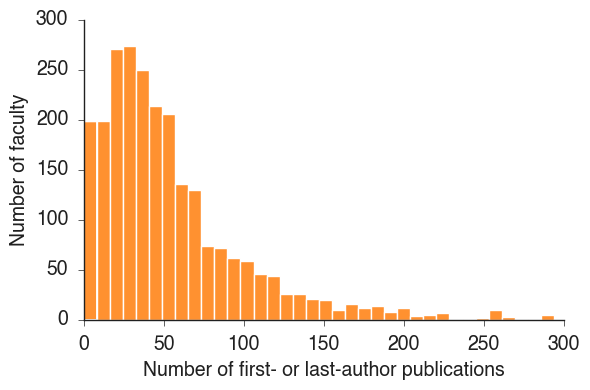

In [19]:
# misc.plotting has lots of predefined sizes, colors, functions for making plots
fig, ax = plt.subplots(figsize=SINGLE_FIG_SIZE)

bins = np.linspace(0, 400, 50)
plt.hist(num_publications, bins=bins, color=ACCENT_COLOR_1, edgecolor='w')

ax.set_xlabel('Number of first- or last-author publications')
ax.set_ylabel('Number of faculty')
ax.set_xlim(0, 300)

finalize(ax)  

plt.show()